In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('master.csv')

In [4]:
data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
data.shape

(27820, 12)

In [8]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [25]:
# Checking for missing values in data set by column

def missing_check(df):
    total = df.isnull().sum()
    count = df.shape[0]   #alternatively  df.isnull().count()
    total_sorted = total.sort_values(ascending = False)
    percent = (total/count).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total_sorted,percent], axis=1, keys=['Total','%'])
  #  print('count is ', count)
  #  print('total is \n', total)
    
    return missing_data
missing_check(data)


,Total,%
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


In [29]:
my_tab = pd.crosstab(index=data["age"],  # Make a crosstab; default is a frequency table
                     columns="Count")                  # Name the count column
my_tab

col_0,Count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


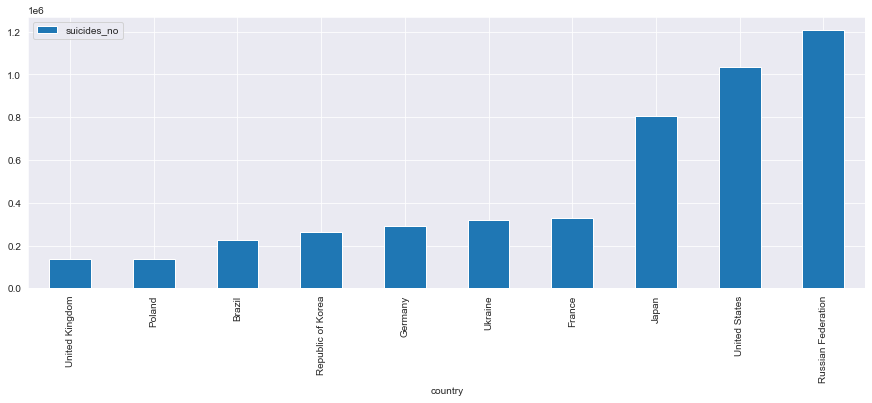

In [39]:
# Number of sui's in top X countries bar plot

data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',
                                                                                                           y='suicides_no',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

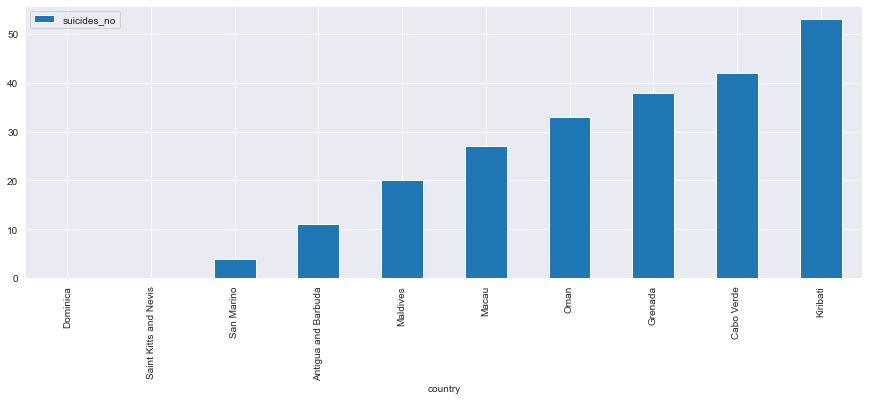

In [40]:
# Number of sui's in bottom X countries bar plot

data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).head(10).plot(x='country',
                                                                                                           y='suicides_no',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

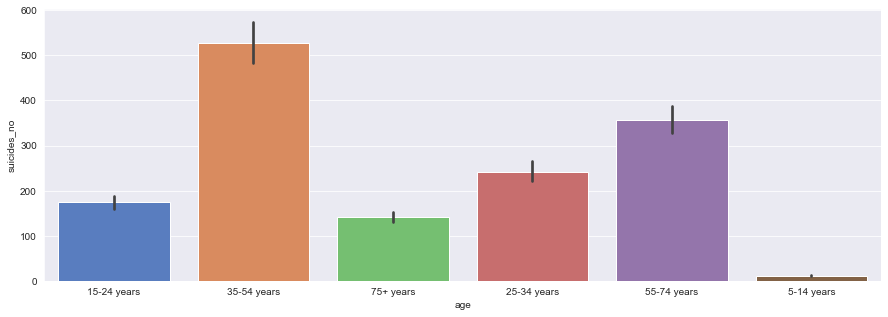

In [43]:
# Avg number of sui's by Age group
plt.figure(figsize=(15,5))  # setting the figure size

ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')  # barplot


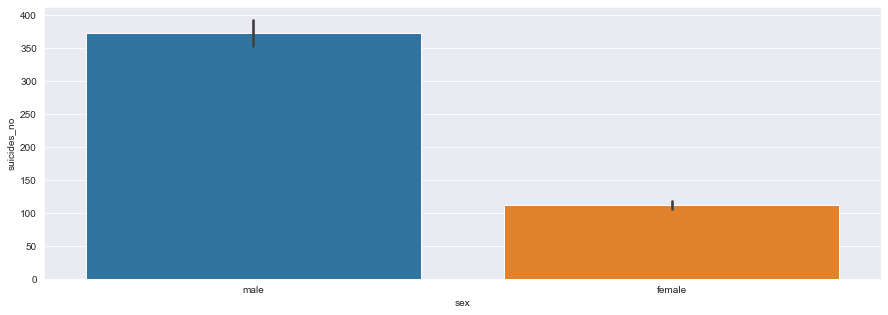

In [46]:
#  No. of sui's by gender 

plt.figure(figsize=(15,5))  # setting the figure size
ax = sns.barplot(x='sex', y='suicides_no', data=data)
#plt.show()

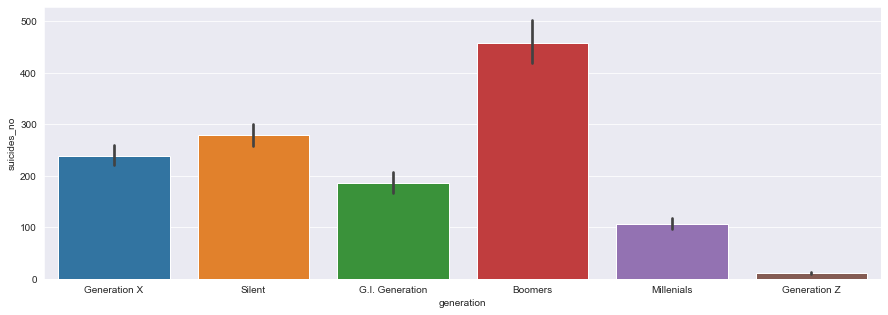

In [47]:
#  No. of sui's by generation

plt.figure(figsize=(15,5))  # setting the figure size
ax = sns.barplot(x='generation', y='suicides_no', data=data)

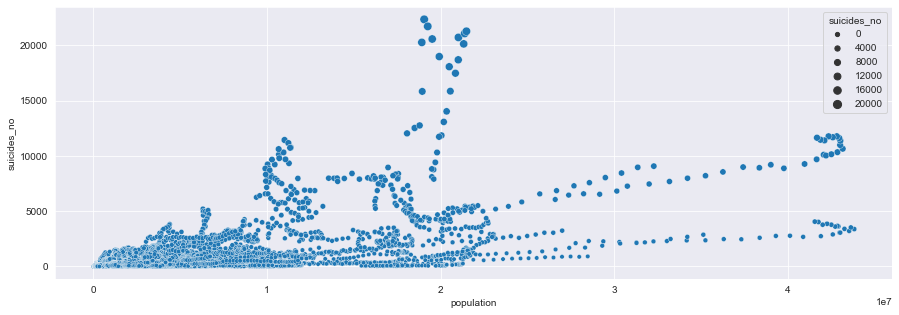

In [48]:
#  Sui's vs population

plt.figure(figsize=(15,5))  # setting the figure size
ax = sns.scatterplot(x='population', y='suicides_no', data=data, size = 'suicides_no')


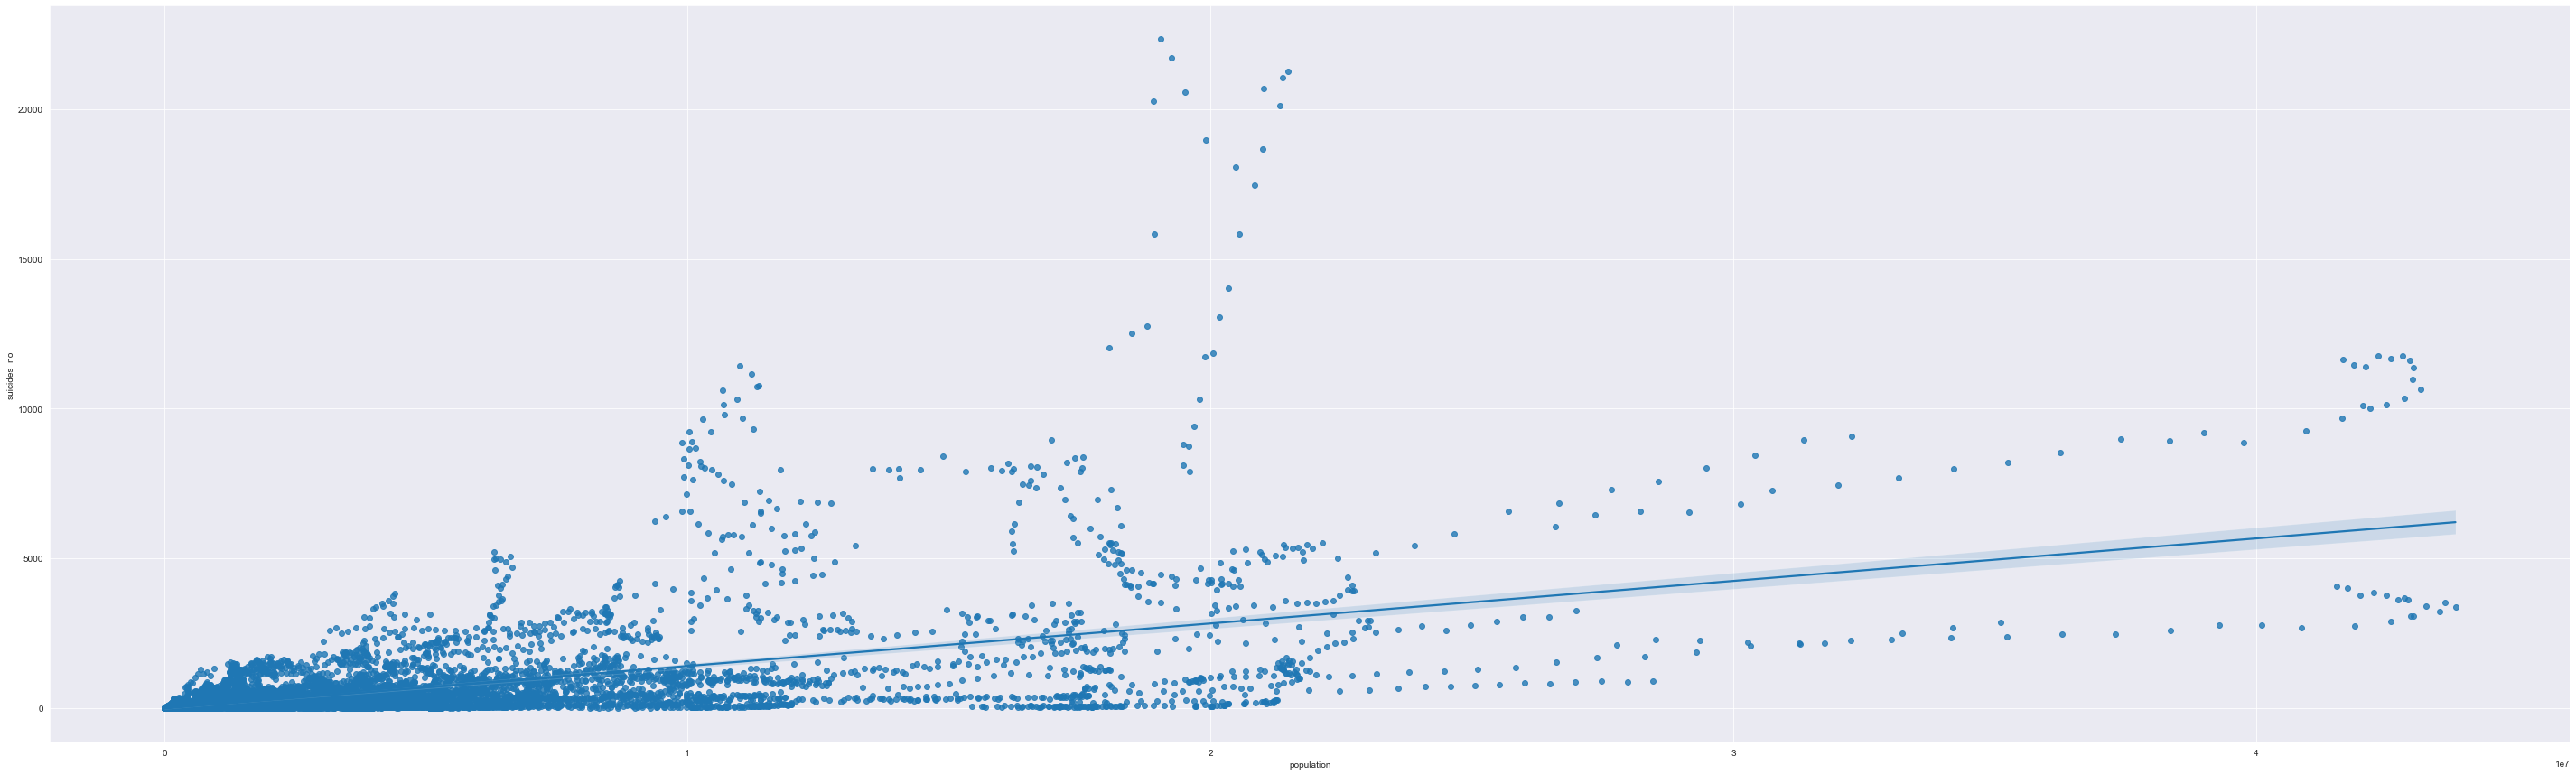

In [49]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='population',y='suicides_no', data=data ) # regression plot - scatter plot with a regression line

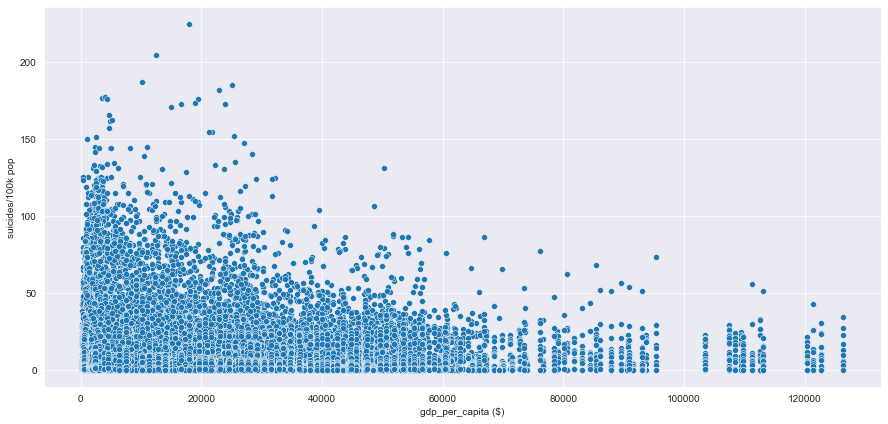

In [51]:
#Scatter plot for Number of Suicides/100k Population Vs GDP Per Capita

figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data) # scatter plot 
plt.show()

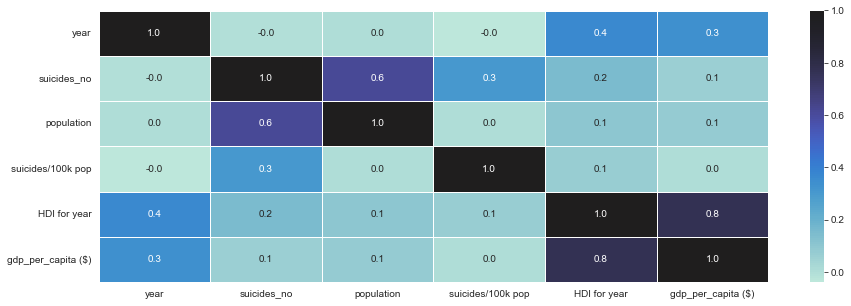

In [53]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

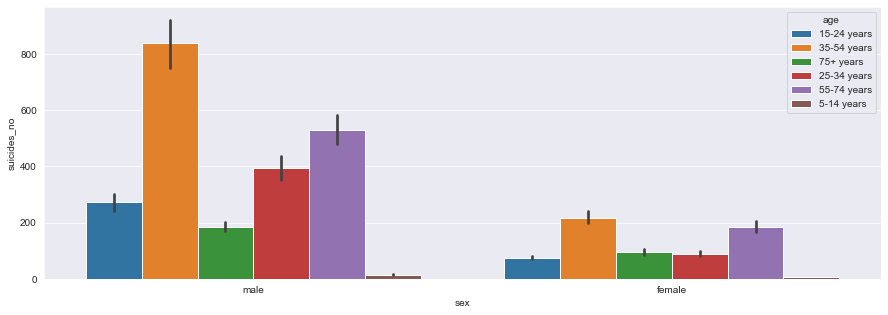

In [57]:
#Bar plot to check Number of suicides by gender and age (three variables used to generate a single plot)

plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='age')
plt.show()

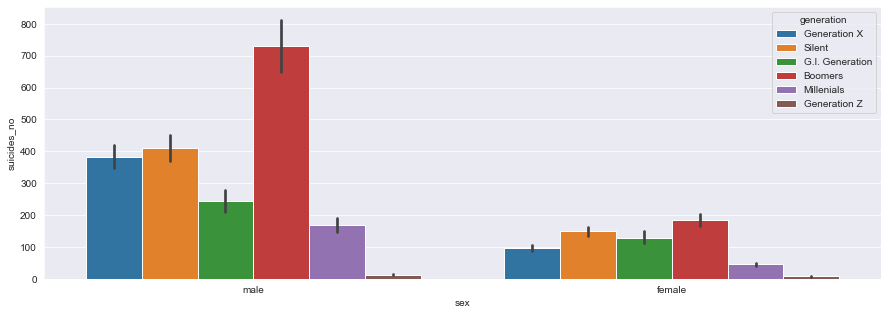

In [58]:
#Bar plot to check Number of suicides by gender and generation (three variables used to generate a single plot)

plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='generation')
plt.show()

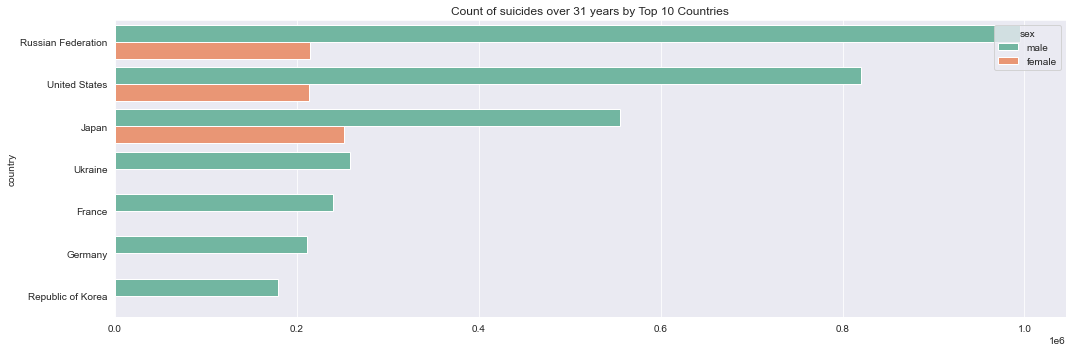

In [69]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides over 31 years by Top 10 Countries')

sns.barplot(y='country', x='suicides_no', hue='sex', data=most_cont_m, palette='Set2');

#plt.ylabel('Count of suicides')
plt.xlabel('')
plt.tight_layout()